In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

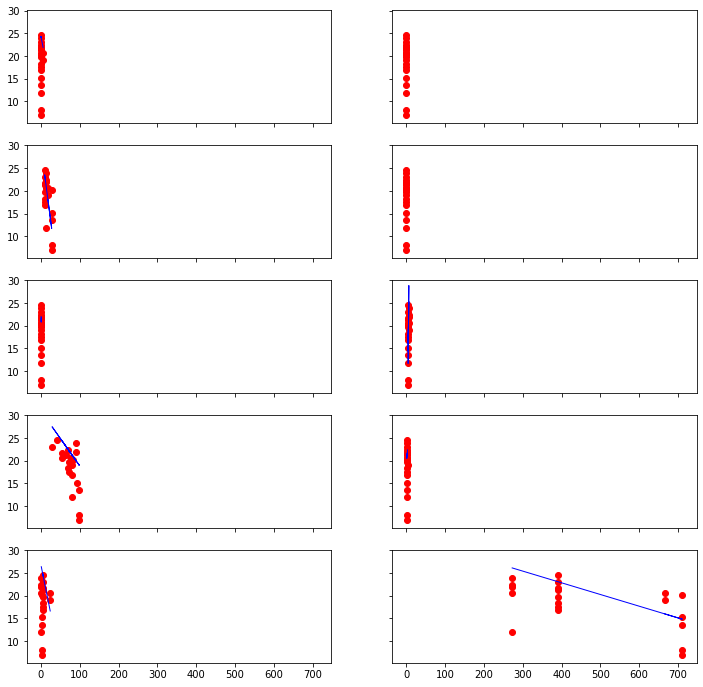

In [4]:
bostons = datasets.load_boston()
f, axarr = plt.subplots(5,2, sharex=True,sharey=True,figsize=(12,12))
for i in range(0,5):
    for j in range(0,2):
        
        bostons_X = bostons.data[:,np.newaxis,i*2+j]
        
        bostons_X_train = bostons_X[:-20]
        bostons_X_test = bostons_X[-20:]
        
        bostons_Y_train = bostons.target[:-20]
        bostons_Y_test = bostons.target[-20:]
        
        regr = linear_model.LinearRegression()
        regr.fit(bostons_X_train, bostons_Y_train)
                
        axarr[i,j].scatter(bostons_X_test, bostons_Y_test,  color='red')
        axarr[i,j].plot(bostons_X_test, regr.predict(bostons_X_test), color='blue', linewidth=1)
        
plt.show()
        

In [8]:
diabetes = datasets.load_boston()
diabetes_X = diabetes.data
diabetes_Y = diabetes.target

diabetes_X_train = diabetes_X[:-50]
diabetes_X_test = diabetes_X[-50:]

diabetes_Y_train = diabetes_Y[:-50]
diabetes_Y_test = diabetes_Y[-50:]

regressors = {}
regressors['LinReg'] = linear_model.LinearRegression()
regressors['Ridge'] = linear_model.Ridge(alpha = .5)
regressors['Lasso'] = linear_model.Lasso(alpha = 5.1)
regressors['ElNet'] = linear_model.ElasticNet(alpha = .5,l1_ratio=0.5)

fit_results = {}

for key in regressors:
    regr = regressors[key]
    regr.fit(diabetes_X_train,diabetes_Y_train)
    mse = np.mean((regr.predict(diabetes_X_test) - diabetes_Y_test) ** 2)
    w = regr.coef_
    wl1 = np.sum(np.abs(w))
    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key] = {'mse': mse,'wl2': wl2,'wl1':wl1,'w':w}
    print("{}\n----------\n  mse={}\n  wl1={}\n  wl2={}\n  w={}\n ".format(key,mse,wl1,wl2,w))
    
    


LinReg
----------
  mse=10.960410679423
  wl1=27.44644771106094
  wl2=18.30257967932424
  w=[-1.05618627e-01  4.91381113e-02  3.21540897e-02  2.51293737e+00
 -1.76280019e+01  3.81765978e+00  1.05792271e-02 -1.43608998e+00
  3.61498721e-01 -1.54712068e-02 -9.12347239e-01  9.85932090e-03
 -5.55092176e-01]
 
Ridge
----------
  mse=11.195127507244013
  wl1=22.455522943462604
  wl2=13.721374175259173
  w=[-1.02102273e-01  5.02013578e-02  8.80018592e-03  2.44957291e+00
 -1.28232742e+01  3.84148840e+00  6.44215775e-03 -1.37722226e+00
  3.53296950e-01 -1.62693966e-02 -8.55851103e-01  9.89548869e-03
 -5.61106278e-01]
 
Lasso
----------
  mse=15.16642047020635
  wl1=0.8815286487451344
  wl2=0.7836759400442239
  w=[-0.          0.04108094 -0.          0.          0.          0.
  0.04466578 -0.          0.         -0.00861893 -0.          0.0059101
 -0.7812529 ]
 
ElNet
----------
  mse=13.894251181932834
  wl1=4.906963287634066
  wl2=2.348667810255262
  w=[-0.08762685  0.05765551 -0.03325711  0.

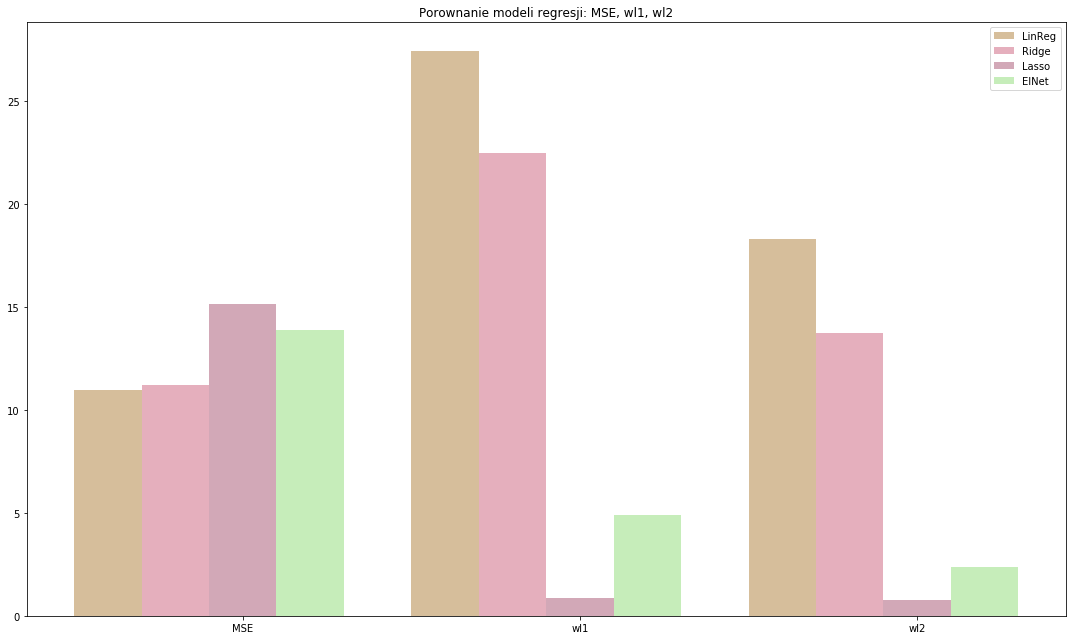

In [11]:
#utworzenie wykresów błedu regresji
groups = 3 
index = np.arange(groups)
bar_width = .2
opacity = 0.4

fig, ax = plt.subplots(figsize=(15,9))

t=0
for key in regressors:
    results = fit_results[key]
    res_val = (results['mse'],results['wl1'],results['wl2'])
    plt.bar(index+ bar_width*t, res_val, bar_width,
                 alpha=opacity,
                 color=np.random.rand(1,3),
                 label=key)
    t+=1
plt.title('Porownanie modeli regresji: MSE, wl1, wl2')
plt.xticks(index + (t-2)*bar_width, ('MSE', 'wl1', 'wl2'))
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

In [3]:
malzenstwo = pd.read_csv('malzenstwo.csv', sep=' ')

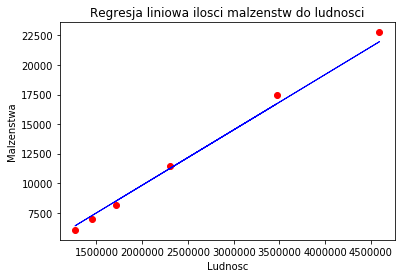

In [18]:
malzenstwo_X_train = malzenstwo.ludnosc[:10]
malzenstwo_X_test = malzenstwo.ludnosc[10:]
malzenstwo_Y_train = malzenstwo.malzenstwa[:10]
malzestwo_Y_test = malzenstwo.malzenstwa[10:]

regr = linear_model.LinearRegression()


regr.fit(malzenstwo_X_train.values.reshape(-1,1), malzenstwo_Y_train.values.reshape(-1,1))

plt.scatter(malzenstwo_X_test.values, malzestwo_Y_test.values,  color='red')
plt.plot(malzenstwo_X_test, regr.predict(malzenstwo_X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa ilosci malzenstw do ludnosci')
plt.xlabel('Ludnosc')
plt.ylabel('Malzenstwa')
plt.show()


In [15]:
wydatki_csv = pd.read_csv('wydatki.csv', sep=' ')
dochody = wydatki_csv.dochody
wydatki = wydatki_csv.wydatki

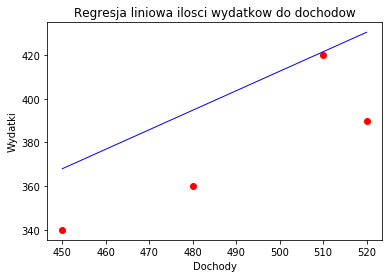

In [23]:
X_train = dochody[:6]
X_test = dochody[6:]
Y_train = wydatki[:6]
Y_test = wydatki[6:]

regr = linear_model.LinearRegression()


regr.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))

plt.scatter(X_test.values, Y_test.values,  color='red')
plt.plot(X_test, regr.predict(X_test.values.reshape(-1,1)), color='blue', linewidth=1)
plt.title('Regresja liniowa ilosci wydatkow do dochodow')
plt.xlabel('Dochody')
plt.ylabel('Wydatki')
plt.show()

In [11]:
numbers = np.random.uniform(0,1,size=(2,100)) # size zwraca nam a*b(w tym wypadku 2 listy po 100 punktow)

In [14]:
#obliczenie srednich dla x i y
avg_X = numbers[0,:].mean()
avg_Y = numbers[1,:].mean()
print('Srednie X: ',avg_X)
print('Srednie Y: ',avg_Y)

Srednie X:  0.47890618542191626
Srednie Y:  0.5181507681913547


In [19]:
#nastepnie dla kazdego x odejmujemy nasz avg_X(tak samo dla y)
roznica_X = np.array([x - avg_X for x in numbers[0,:]]) #uzycie LC szybkiego obliczenia wartosci
roznica_Y = np.array([y - avg_Y for y in numbers[1,:]])
# print('Roznice w X',roznica_X)
# print('Roznice w Y',roznica_Y)


In [21]:
#teraz musimy policzyc kwadrat tych wartosci
roznica_X_kwadrat = np.square(roznica_X)
roznica_Y_kwadrat = np.square(roznica_Y)
# print('Kwadrat roznicy X: ',roznica_X_kwadrat)
# print('Kwadrat roznicy Y: ',roznica_Y_kwadrat)


In [23]:
#musimy rowniez obliczyc wyrazenie:(x−x¯)∗(y−y¯) 
iloczyn_roznic = roznica_X_kwadrat * roznica_Y_kwadrat
# print('Iloczyn roznic: ',iloczyn_roznic)

In [24]:
#utworzenie zbioru DataFrame ze wszystkimi danymi
dane = pd.DataFrame(data = {'X': numbers[0,:],
                           'Y': numbers[1,:],
                           'X-avg_X': roznica_X,
                           'Y-avg_Y': roznica_Y,
                           'Kwadrat_roznic_X': roznica_X_kwadrat,
                           'Kwadrat_roznic_Y': roznica_Y_kwadrat,
                           'Iloczyn_roznic': iloczyn_roznic})

In [27]:
# dane

,X,Y,X-avg_X,Y-avg_Y,Kwadrat_roznic_X,Kwadrat_roznic_Y,Iloczyn_roznic
0,0.355678,0.328686,-0.123228,-0.189465,0.015185,0.035897,0.000545
1,0.974395,0.854939,0.495489,0.336788,0.245509,0.113426,0.027847
2,0.517837,0.964440,0.038931,0.446290,0.001516,0.199174,0.000302
3,0.308234,0.574149,-0.170672,0.055998,0.029129,0.003136,0.000091
4,0.242333,0.747859,-0.236573,0.229708,0.055967,0.052766,0.002953
...,...,...,...,...,...,...,...
95,0.348582,0.003468,-0.130324,-0.514683,0.016984,0.264899,0.004499
96,0.662447,0.550095,0.183541,0.031944,0.033687,0.001020,0.000034
97,0.459706,0.691595,-0.019200,0.173444,0.000369,0.030083,0.000011
98,0.985834,0.387732,0.506928,-0.130419,0.256976,0.017009,0.004371


In [56]:
#obliczenie wartosci a (suma iloczynu roznic X - avg_X oraz Y - avg_Y) podzielona przez kwadrat roznic X - avg_X
licznik = dane['Iloczyn_roznic'].sum()
print('Licznik : ',licznik)

Licznik :  0.6253511197430257


In [57]:
mianownik = dane['Kwadrat_roznic_X'].sum()
print('Mianownik: ',mianownik)

Mianownik:  8.45355012074348


In [59]:
wartosc_a = licznik/mianownik
print('Wartosc a: ',wartosc_a)

Wartosc a:  0.07397497037469826


In [60]:
wartosc_b = avg_Y - wartosc_a * avg_X
print('Wartosc b:', wartosc_b)

Wartosc b: 0.48272369731250875


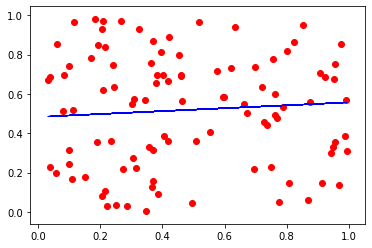

In [62]:
plt.scatter(numbers[0,:], numbers[1,:],  color='red')
plt.plot(numbers[0,:], wartosc_a * numbers[0,:] + wartosc_b, color='blue', linewidth=1)
plt.show()